In [93]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [94]:
train = pd.read_csv("E:/AIfellowship/Banking Project/Data/train_ctrUa4K.csv")
test =  pd.read_csv("E:/AIfellowship/Banking Project/Data/test_lAUu6dG.csv")

In [95]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [96]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
test.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

###### Observation: 
.we have 12 independent variables and 1 target variables. i.e loan status in the train data set and 12 independent variablle iin the test s

In [98]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

as we can see there are three format of data types:
    object,int64,float64

In [99]:
train.shape, test.shape

((614, 13), (367, 12))

##### UNIVERATE ANALYSIS 

in this section we will do univeriate analysis, it is the simplest form of anlyzing data, where we examine each variable individually.
for categorical features we can use bar plot or frequency table, for numerical features we use probability density plot

###### Target variable 

In [100]:
train['Loan_Status'].value_counts()
#train['Loan_Status'].value_counts(normalize=True)

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

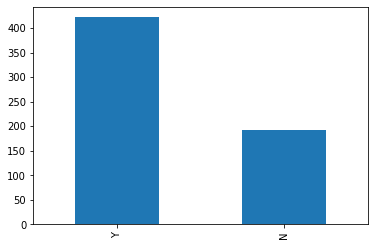

In [101]:
train['Loan_Status'].value_counts().plot.bar()

Oberavation: the loan of 422(around 69) people out of 614 was approved

###### Categorical value

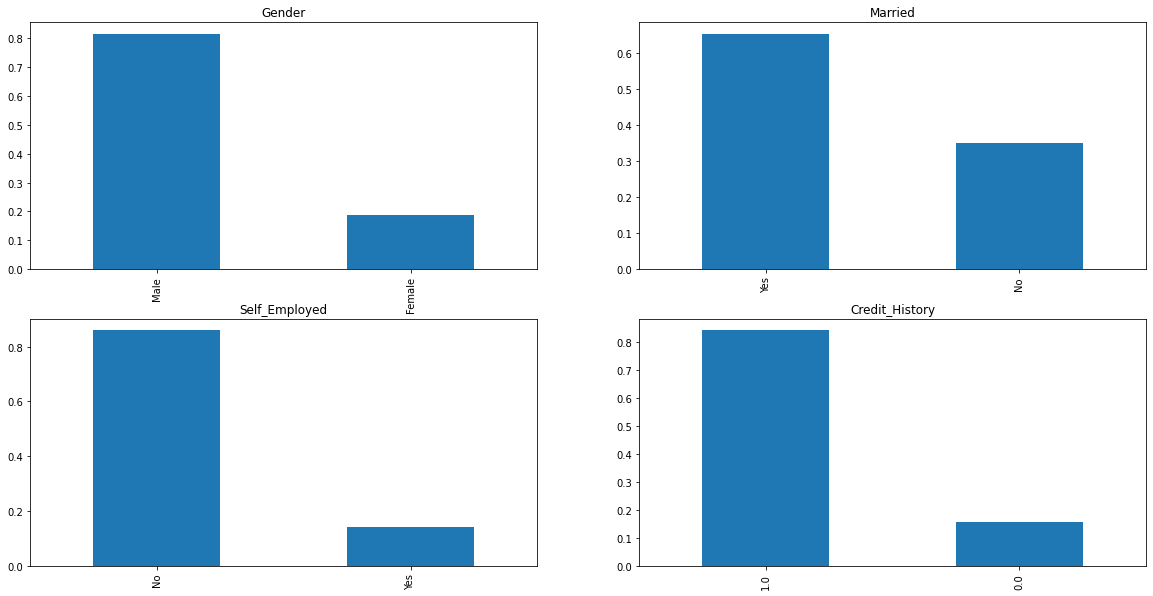

In [102]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Gender')

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Married')

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Self_Employed')


plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Credit_History')



plt.show()


From the a bove plot we can see that :
    >80% applicants in the dataset are male 
    >Around 65% of the applicants in the dataset are married 
    > aroud 15% applicants are self employed 
    and aroudu 85% applicants have repaid their debts 

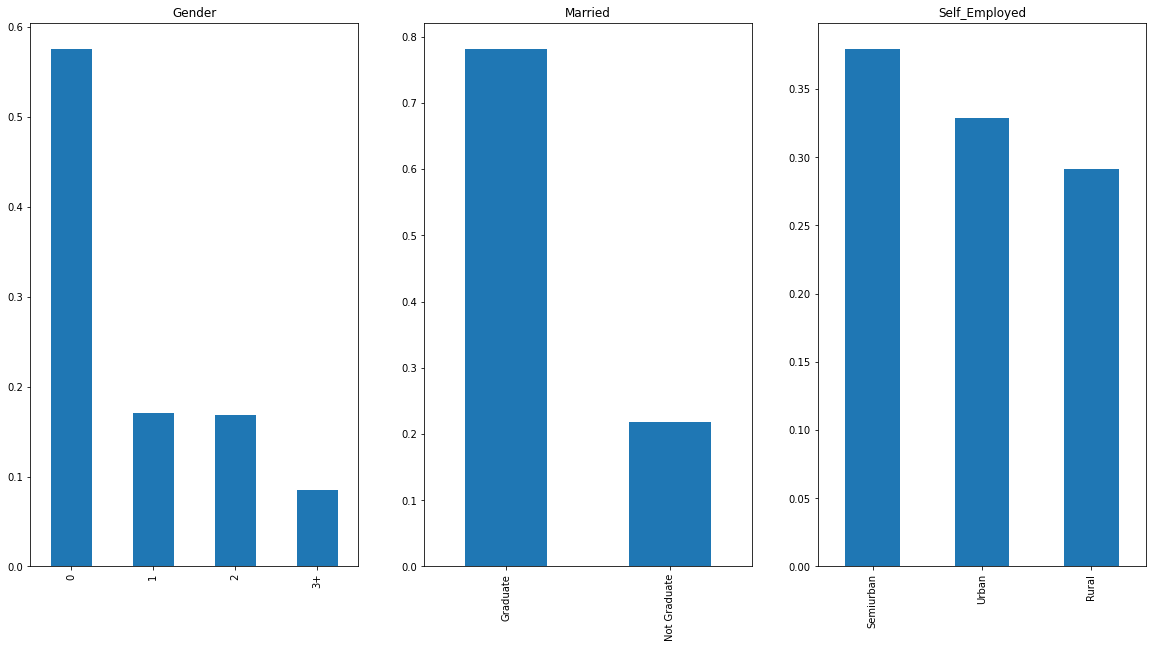

In [103]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Gender')

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Married')

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title ='Self_Employed')


plt.show()


following inferences can be made from the above bar plot:
    .most of the appliacants dont have any dependents 
    around 80% of the appliacants are graduate 
    most of the appliacants are from semi uraban area 

##### Numerical Variable

<Figure size 432x288 with 0 Axes>

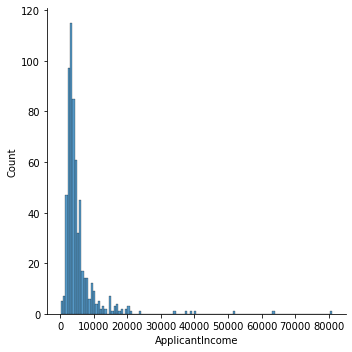

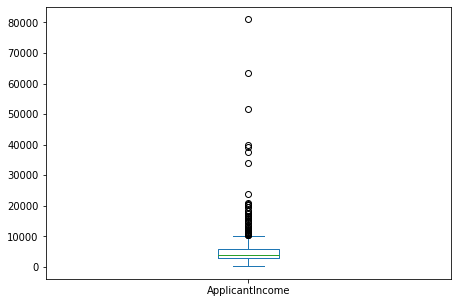

In [139]:
plt.figure(1)

#plt.subplot(121)
sns.displot(train['ApplicantIncome'])

plt.show()

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()


Obervation: 
    .it can be inferred that most of the data in the distibution of applicant income is towards left which means it is not notrmally distributed. 
    .the boxplot confirms the presence of a lot of outiliers/extreme values. this can be attributed to the income disparity in the society. part of this can be driven by the fact that we are looking at people with different education levels. let aggregate by Education

In [144]:
train.boxplot(column='ApplicantIncome', by = 'Education')


KeyError: 'Education'

##### Obervation
.from the above graph we can see that there is a higher number of graduates with very high incomes which are appearing ato be the outiliers



<Figure size 432x288 with 0 Axes>

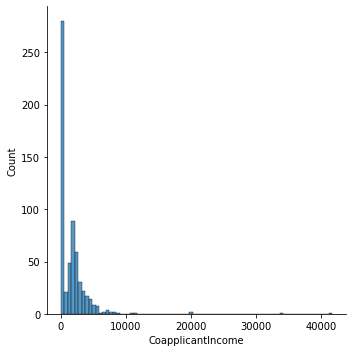

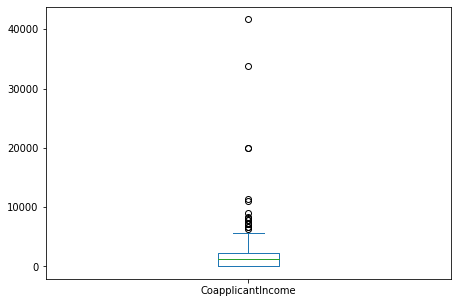

In [114]:
plt.figure(1)

#plt.subplot(121)
sns.displot(train['CoapplicantIncome'])
plt.show()

plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

<Figure size 432x288 with 0 Axes>

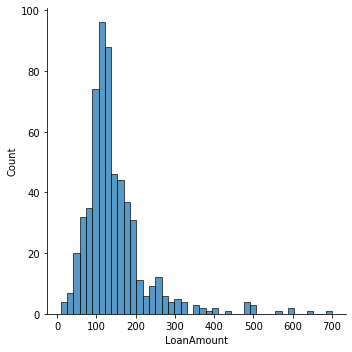

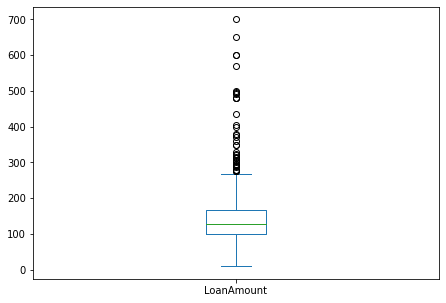

In [145]:
plt.figure(1)

#plt.subplot(121)
df=train.dropna()
sns.displot(train['LoanAmount'])
plt.show()

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

#### Bivariate analysis

after looking at every variable individual in univariate, we will now explore them again with the respect to the target variable, that is what we call Bivariate analysis
it is the simplest form of anlyzing data, where we examine two variables (Indepent variable and target variable)

##### The hypotheses

* Applicants with high income should have more chances of loan approval
* Applicants who have repaid their previous debts should have higher chances of loan approval
* Loan approval should also depend on the loan amount. if the loan amount is less, chancesances of loan approval should be higher
* lesser the amount to be paid monthly to repay the loan, higher the the chances of loan approval

##### 1. Categorical independent  variable vs Target Variable 

<AxesSubplot:xlabel='Gender'>

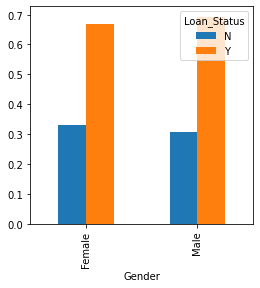

In [116]:
Gender= pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',  figsize=(4,4))

From the above graph we can see that the proportion of male and female applicants is more or less same for both approved and unapproved loans

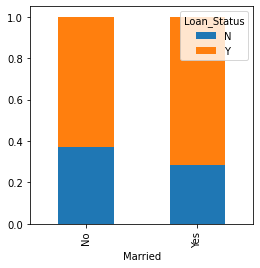

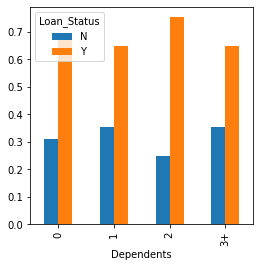

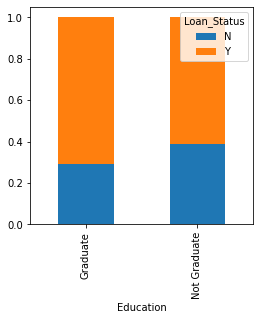

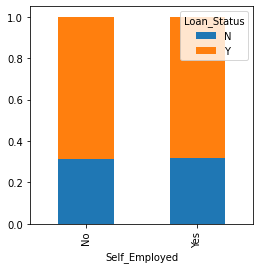

In [117]:
Married= pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))


Dependents= pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

Education= pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Self_Employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

plt.show()

##### Observation

*Proportion of married applicants is higher for the approved loans 

*Distribution of applicants with 1 or 3+ dependents is similar acreoss both the categories of loan status 

*there is nothing significant we can infer from self employed vs loan_status plot 
for approved and non approved in both categories are the same (i.e being employed or not )

#### for oridinal features 

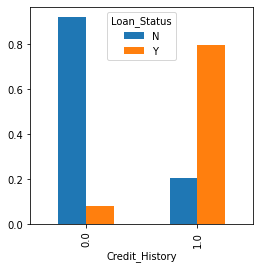

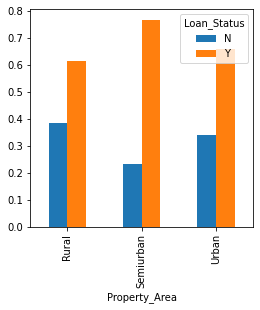

In [118]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))


Property_Area= pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

plt.show()

#### Obervation

*It seems people with credit history as 1 are more likely to get their loans approved.

*Proporation of loans getting approved in semi urban is higher as compared to that in rural or urbon areas 


<AxesSubplot:xlabel='Loan_Status'>

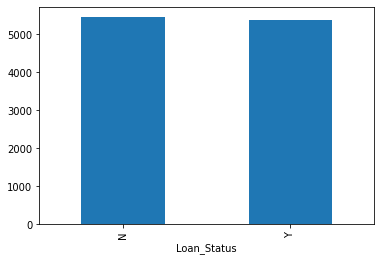

In [119]:
#Numerical features vs target variable 
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


here the y_axis represents the mean applicant income. we dont see any change in the mean income. so let make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

Text(0, 0.5, 'percentage')

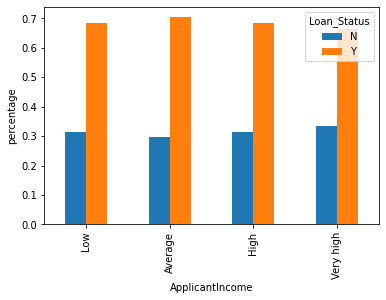

In [120]:
bins = [0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']

train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar')

plt.xlabel('ApplicantIncome') 
plt.ylabel('percentage')

#### Observation 

It can be inferred that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high

let analyze the coapplicant income and loan amount variable in similar manner as applicant income

In [121]:
train['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Text(0, 0.5, 'percentage')

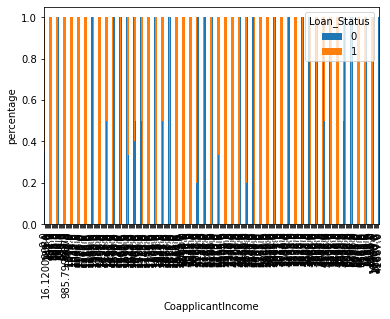

In [129]:
bins = [0,1000,3000,42000]
group=['Low', 'Average','High']

train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coaplicant_Income_bin = pd.crosstab(train['CoapplicantIncome'], train['Loan_Status'])
Coaplicant_Income_bin.div(Coaplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True )

plt.xlabel("CoapplicantIncome") 
plt.ylabel('percentage')

#### Obseravation 

it shows that if coapplicant's income is less the chances of loan approval are high.
but this does not look right. the possible reason behins this may be that the most of the applicant dont have any coapplicant so the coaplicant income for such applicants is 0 and hence the loan approval is not dependent on it. so we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval 


Text(0, 0.5, 'Percentage')

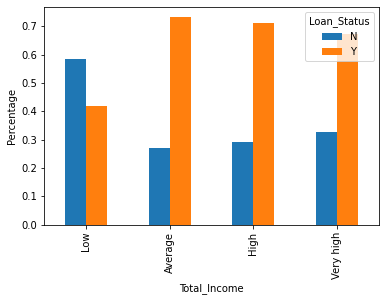

In [123]:
#Total income = Applicant Income + Coapllicant Income

train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

#we use bins 
bins= [0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']

train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),
                    axis=0).plot(kind="bar")
plt.xlabel('Total_Income')
plt.ylabel('Percentage')


#### Observation
We can see that proportion of loans getting approved for applicants having low Total_Income is very less ac compared to that of applicants with average,high,and very high income.

Text(0, 0.5, 'percentage')

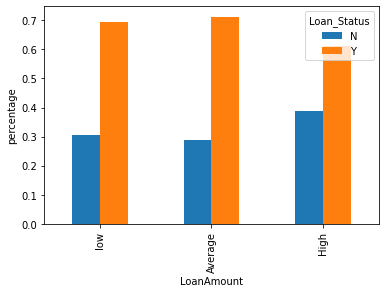

In [124]:
# Loan amount 

bins = [0,100,200,700] 
group=['low','Average','High']

train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar')


plt.xlabel('LoanAmount')
plt.ylabel('percentage')

#### Observation

it can be seen that the proportion of approved loans is higher for low and average loan Amount as compared to that of high loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less

In [125]:
train.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average


In [126]:
#let drop the bins i created for the exploration part 
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)

#change 3+ in dependent variable to 3
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

#convert the target variable to numerical variable (0,1) becouse some algo do not except categorical variable like logistics
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)



In [127]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


Now let look the correlation between all the numerical variables. we will use the heatmap to visualize the correlation
Heatmaps visualize data through variations in coloring. the variables with datarker color means their correlations is %more


<AxesSubplot:>

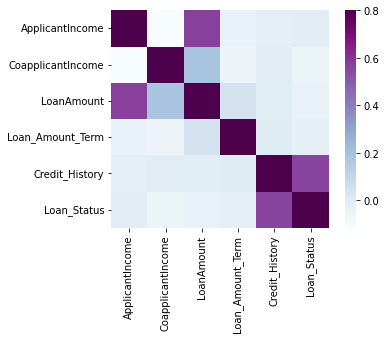

In [128]:
Corr = train.corr() 
sns.heatmap(Corr, vmax=.8, square=True, cmap="BuPu")


#### Missing Value and OUtlier Treatment 

After exploring all the variables in our data, we can now impute the missing values and treat the outliers becouse missing data and outliers can have adverse effect on the model performance. 

In [69]:
#missing value
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing value in Gender, Married,Dependents, Self Employed, Loan_amount_Term and credit_History features.

i will treat the missing values in all features one by one 

consider these methods to fill the missing  values:

 .for numerical variable: imputation using mean or median

.for categorical variable: imputation using model 


In [70]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [71]:
# For loan amount term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable the value of 360 is repeating the most. so we will replace the missing values in this variables using the mode of this variable 



In [72]:
train ['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

for loan Amount ,as it is numerical value we can mean or median to impute the missing values. we will use median to fill the null values as earlier we saw that loan amount have the outliers so the mean will not be the proper approach as it is highly affected by presence of outiliers 

In [73]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [74]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

As we can see that all the missing values have been filled in the train data set, let fill all the missing values in the test dataset too with the same approach

In [76]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [77]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

###### Outilier Treatment 
In univariate analysis we saw that the loanAmount contains outliers so we have to treat them as the presence of outliers affects the distributon of the data.

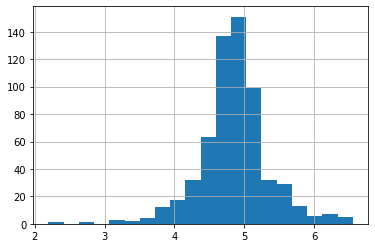

In [78]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. let's build a logistic regression model and make predictions for the test dataset

### Model Building Part 1

In [79]:
#drooing Loan ID variable in train and test data as it doesnot affect loan status 

train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [80]:
# independent and dependent variable 

X = train.drop('Loan_Status',1)
Y = train.Loan_Status

In [132]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)